In [ ]:
#1. EDA
#2. ABT COnstruction
#3. Classification Algorithms
#4. Model Training
#5. Project Delivery

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns',100)
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df= pd.read_csv('employee_data.csv')

In [3]:
df.shape

(14249, 10)

In [7]:
df.dtypes

avg_monthly_hrs        int64
department            object
filed_complaint      float64
last_evaluation      float64
n_projects             int64
recently_promoted    float64
salary                object
satisfaction         float64
status                object
tenure               float64
dtype: object

In [8]:
df.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
0,221,engineering,NaN,0.932868,4,NaN,low,0.829896,Left,5.0
1,232,support,NaN,NaN,3,NaN,low,0.834544,Employed,2.0
2,184,sales,NaN,0.788830,3,NaN,medium,0.834988,Employed,3.0
3,206,sales,NaN,0.575688,4,NaN,low,0.424764,Employed,2.0
4,249,sales,NaN,0.845217,3,NaN,low,0.779043,Employed,3.0


In [9]:
df.tail(10)

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
14239,242,finance,NaN,0.781112,6,NaN,low,0.669866,Left,5.0
14240,131,engineering,NaN,0.531197,2,NaN,low,0.341842,Left,3.0
14241,235,IT,NaN,0.683498,3,NaN,medium,0.923564,Employed,3.0
14242,157,support,NaN,0.707167,5,NaN,low,0.834708,Employed,4.0
14243,272,engineering,NaN,0.815504,4,NaN,low,0.693387,Employed,2.0
14244,178,IT,NaN,0.735865,5,NaN,low,0.263282,Employed,5.0
14245,257,sales,NaN,0.638604,3,NaN,low,0.868209,Employed,2.0
14246,232,finance,1.0,0.847623,5,NaN,medium,0.898917,Left,5.0
14247,130,IT,NaN,0.757184,4,NaN,medium,0.641304,Employed,3.0
14248,159,NaN,NaN,0.578742,3,NaN,medium,0.808850,Employed,3.0


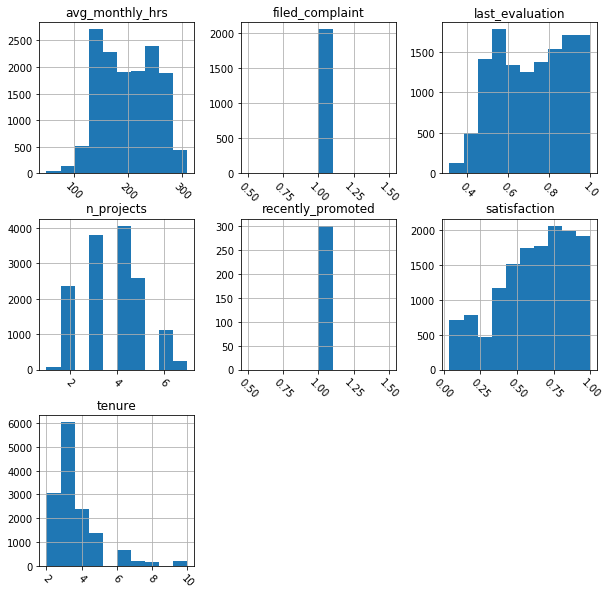

In [4]:
# Plot histogram grid
df.hist(figsize=(10,10), xrot=-45)

# Clear the text "residue"
plt.show()

In [15]:
df.describe()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure
count,14249.000000,2058.0,12717.000000,14249.000000,300.0,14068.000000,14068.000000
mean,199.795775,1.0,0.718477,3.773809,1.0,0.621295,3.497228
std,50.998714,0.0,0.173062,1.253126,0.0,0.250469,1.460917
min,49.000000,1.0,0.316175,1.000000,1.0,0.040058,2.000000
25%,155.000000,1.0,0.563866,3.000000,1.0,0.450390,3.000000
50%,199.000000,1.0,0.724939,4.000000,1.0,0.652527,3.000000
75%,245.000000,1.0,0.871358,5.000000,1.0,0.824951,4.000000
max,310.000000,1.0,1.000000,7.000000,1.0,1.000000,10.000000


In [17]:
df.describe(include=['object'])

,department,salary,status
count,13540,14249,14249
unique,12,3,2
top,sales,low,Employed
freq,3923,6952,10857


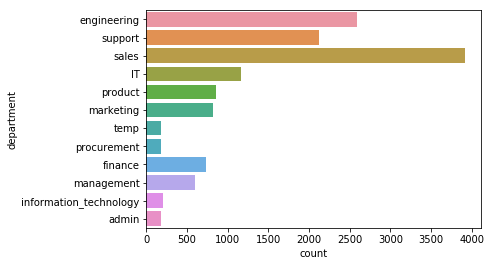

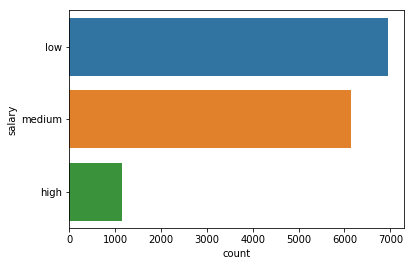

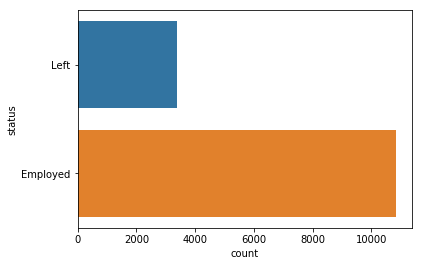

In [18]:
for feature in df.dtypes[df.dtypes == 'object'].index:
    sns.countplot(y=feature, data=df)
    plt.show()

C:\Users\DELL\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


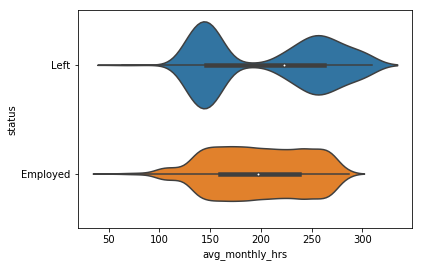

In [19]:
sns.violinplot(y='status', x='avg_monthly_hrs', data=df)
plt.show()

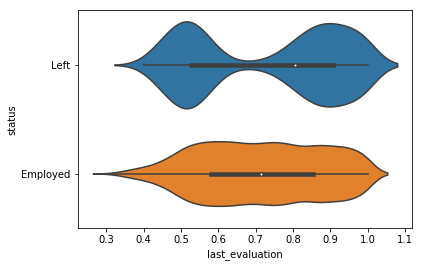

In [20]:
sns.violinplot(y='status', x='last_evaluation', data=df)
plt.show()

In [8]:
df.groupby('status').mean()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure
status,,,,,,,
Employed,197.700286,1.0,0.714479,3.755273,1.0,0.675979,3.380245
Left,206.502948,1.0,0.730706,3.833137,1.0,0.447500,3.869023


In [ ]:
# Did leavers work more hours per month - yes
#leavers longer tenure - yes
#on average did leavers have lower evaluation than those where are still employed -  leavers had higher not lower performance evalution
#what % of leavers filed a complaint?
#leavers recently promoted and who are still employed?

In [9]:
#Adhoc Alterations
df.department.replace('information_technology', 'IT', inplace=True)

In [10]:
#remove obeservations for temp
df = df[df.department != 'temp']

In [11]:
df.shape

(14068, 10)

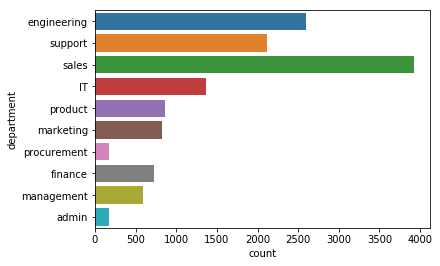

In [12]:
sns.countplot(y='department', data=df)
plt.show()

In [26]:
df.groupby('department').mean().sort_values(by='avg_monthly_hrs')

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure
department,,,,,,,
procurement,199.482759,1.0,0.699205,3.885057,1.0,0.627930,3.264368
marketing,199.664225,1.0,0.715018,3.687424,1.0,0.629122,3.567766
product,199.991860,1.0,0.719616,3.817442,NaN,0.628774,3.487209
sales,200.842467,1.0,0.711254,3.772878,1.0,0.623075,3.527148
support,200.975495,1.0,0.723200,3.804430,1.0,0.626923,3.394910
management,201.025210,1.0,0.729714,3.857143,1.0,0.630428,4.294118
finance,201.175824,1.0,0.723880,3.815934,1.0,0.586787,3.543956
admin,201.272727,1.0,0.726282,3.897727,1.0,0.611450,3.369318
IT,202.174453,1.0,0.720017,3.810219,1.0,0.628079,3.456204


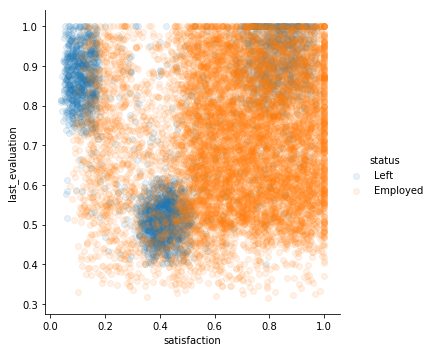

In [13]:
# Scatterplot of satisfaction vs. last_evaluation
sns.lmplot(x='satisfaction',
           y='last_evaluation',
           hue='status',
           data=df,
           fit_reg=False,
           scatter_kws={'alpha':0.1})
plt.show()

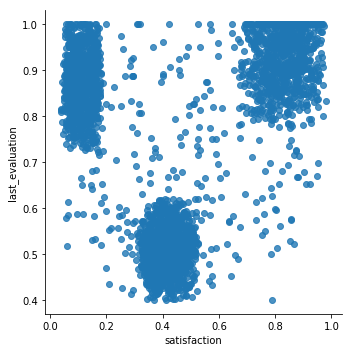

In [14]:
# Scatterplot of satisfaction vs. last_evaluation, only those who have left
sns.lmplot(x='satisfaction',
           y='last_evaluation',
           data=df[df.status == 'Left'],
           fit_reg=False)
plt.show()

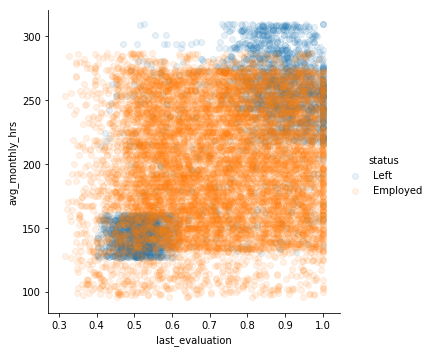

In [15]:
# Scatterplot of last_evaluation vs. avg_monthly_hrs
sns.lmplot(x='last_evaluation',
           y='avg_monthly_hrs',
           hue='status',
           data=df,
           fit_reg=False,
           scatter_kws={'alpha':0.1})
plt.show()

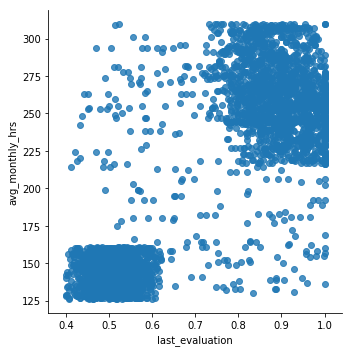

In [16]:
# Scatterplot of last_evaluation vs. avg_monthly_hrs for leavers
sns.lmplot(x='last_evaluation', y='avg_monthly_hrs', data=df[df.status=='Left'], fit_reg=False)
plt.show()

In [ ]:
#avg_monthly_hrs>215 and last_evalution<0.75

In [17]:
#Adhoc Data Cleaning
print(df.filed_complaint.unique())
print(df.recently_promoted.unique())

[nan  1.]
[nan  1.]


In [18]:
df.filed_complaint.fillna(0, inplace=True)
df.recently_promoted.fillna(0, inplace=True)

C:\Users\DELL\Anaconda\lib\site-packages\pandas\core\generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [19]:
correlation = df.corr()
correlation

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure
avg_monthly_hrs,1.000000,-0.007238,0.340136,0.418882,-0.001203,-0.019622,0.124954
filed_complaint,-0.007238,1.000000,-0.014694,-0.003293,0.043196,0.056338,0.007224
last_evaluation,0.340136,-0.014694,1.000000,0.345590,-0.008359,0.089189,0.132100
n_projects,0.418882,-0.003293,0.345590,1.000000,-0.004901,-0.143514,0.192653
recently_promoted,-0.001203,0.043196,-0.008359,-0.004901,1.000000,0.025797,0.068991
satisfaction,-0.019622,0.056338,0.089189,-0.143514,0.025797,1.000000,-0.097301
tenure,0.124954,0.007224,0.132100,0.192653,0.068991,-0.097301,1.000000


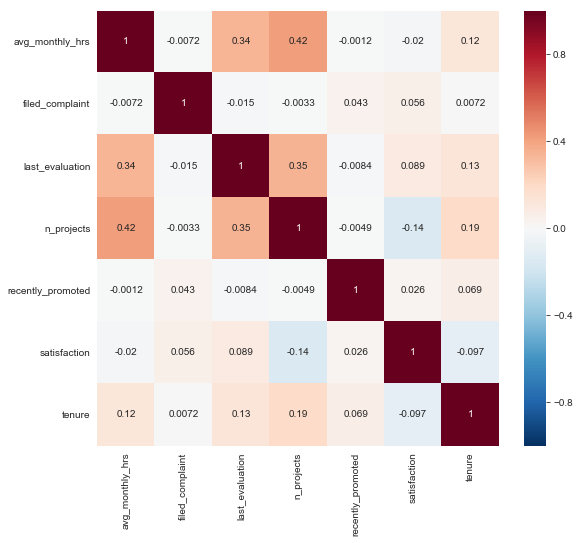

In [20]:
corr = df.corr()

sns.set_style('whitegrid')
plt.figure(figsize=(9,8))
sns.heatmap(corr,
            annot=True,
            cmap='RdBu_r',
            vmin=-1,
            vmax=1)
plt.show()

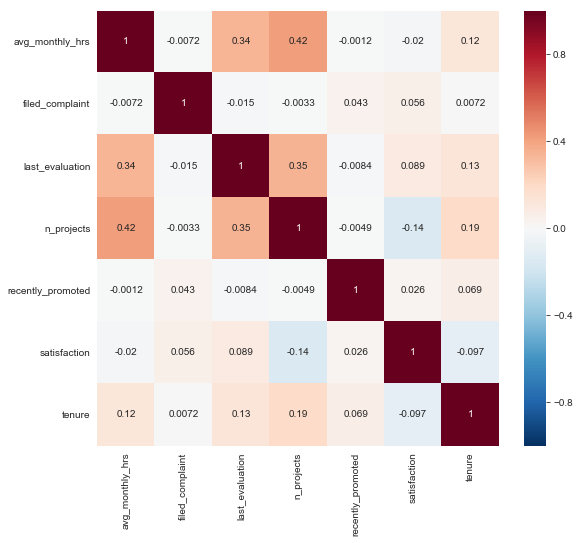

In [21]:
corr = df.corr()

plt.figure(figsize=(9,8))
sns.heatmap(corr,
            annot=True,
            cmap='RdBu_r',
            vmin=-1,
            vmax=1)
plt.show()

In [44]:
#Adhoc Feature Engineering
print(df.salary.unique())

['low' 'medium' 'high']


In [22]:
df['salary_numeric'] = df.salary.replace({'low': 0, 'medium': 1, 'high': 2})

C:\Users\DELL\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


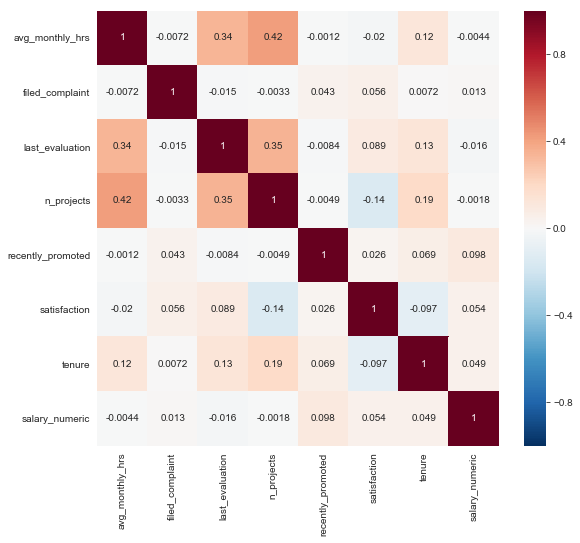

In [23]:
corr = df.corr()

plt.figure(figsize=(9,8))
sns.heatmap(corr,
            annot=True,
            cmap='RdBu_r',
            vmin=-1,
            vmax=1)
plt.show()